# Task 2

---

## Predictive modeling of customer bookings

This Jupyter notebook includes some code to get you started with this predictive modeling task. We will use various packages for data manipulation, feature engineering and machine learning.

### Exploratory data analysis

First, we must explore the data in order to better understand what we have and the statistical properties of the dataset.

In [46]:
import pandas as pd

In [47]:
df = pd.read_csv("customer_booking.csv", encoding="ISO-8859-1")
df.head()

,num_passengers,sales_channel,trip_type,purchase_lead,length_of_stay,flight_hour,flight_day,route,booking_origin,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration,booking_complete
0,2,Internet,RoundTrip,262,19,7,Sat,AKLDEL,New Zealand,1,0,0,5.52,0
1,1,Internet,RoundTrip,112,20,3,Sat,AKLDEL,New Zealand,0,0,0,5.52,0
2,2,Internet,RoundTrip,243,22,17,Wed,AKLDEL,India,1,1,0,5.52,0
3,1,Internet,RoundTrip,96,31,4,Sat,AKLDEL,New Zealand,0,0,1,5.52,0
4,2,Internet,RoundTrip,68,22,15,Wed,AKLDEL,India,1,0,1,5.52,0


The `.head()` method allows us to view the first 5 rows in the dataset, this is useful for visual inspection of our columns

In [48]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 14 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   num_passengers         50000 non-null  int64  
 1   sales_channel          50000 non-null  object 
 2   trip_type              50000 non-null  object 
 3   purchase_lead          50000 non-null  int64  
 4   length_of_stay         50000 non-null  int64  
 5   flight_hour            50000 non-null  int64  
 6   flight_day             50000 non-null  object 
 7   route                  50000 non-null  object 
 8   booking_origin         50000 non-null  object 
 9   wants_extra_baggage    50000 non-null  int64  
 10  wants_preferred_seat   50000 non-null  int64  
 11  wants_in_flight_meals  50000 non-null  int64  
 12  flight_duration        50000 non-null  float64
 13  booking_complete       50000 non-null  int64  
dtypes: float64(1), int64(8), object(5)
memory usage: 5.3+ 

The `.info()` method gives us a data description, telling us the names of the columns, their data types and how many null values we have. Fortunately, we have no null values. It looks like some of these columns should be converted into different data types, e.g. flight_day.

To provide more context, below is a more detailed data description, explaining exactly what each column means:

- `num_passengers` = number of passengers travelling
- `sales_channel` = sales channel booking was made on
- `trip_type` = trip Type (Round Trip, One Way, Circle Trip)
- `purchase_lead` = number of days between travel date and booking date
- `length_of_stay` = number of days spent at destination
- `flight_hour` = hour of flight departure
- `flight_day` = day of week of flight departure
- `route` = origin -> destination flight route
- `booking_origin` = country from where booking was made
- `wants_extra_baggage` = if the customer wanted extra baggage in the booking
- `wants_preferred_seat` = if the customer wanted a preferred seat in the booking
- `wants_in_flight_meals` = if the customer wanted in-flight meals in the booking
- `flight_duration` = total duration of flight (in hours)
- `booking_complete` = flag indicating if the customer completed the booking

Before we compute any statistics on the data, lets do any necessary data conversion

In [49]:
df["flight_day"].unique()

array(['Sat', 'Wed', 'Thu', 'Mon', 'Sun', 'Tue', 'Fri'], dtype=object)

In [50]:
mapping = {
    "Mon": 1,
    "Tue": 2,
    "Wed": 3,
    "Thu": 4,
    "Fri": 5,
    "Sat": 6,
    "Sun": 7,
}

df["flight_day"] = df["flight_day"].map(mapping)

In [51]:
df["flight_day"].unique()

array([6, 3, 4, 1, 7, 2, 5])

In [52]:
df["sales_channel"].unique()

array(['Internet', 'Mobile'], dtype=object)

In [53]:
mapping = {'Internet':0,'Mobile':1}
df["sales_channel"] = df["sales_channel"].map(mapping)

In [54]:
df['trip_type'].unique()

array(['RoundTrip', 'CircleTrip', 'OneWay'], dtype=object)

In [55]:
mapping = {'RoundTrip':1, 'CircleTrip':2, 'OneWay':3}
df["trip_type"] = df["trip_type"].map(mapping)

In [56]:
from sklearn.preprocessing import LabelEncoder

In [57]:
le = LabelEncoder()
label1 = le.fit_transform(df['route'])
label2 = le.fit_transform(df['booking_origin'])
df.drop("route", axis=1, inplace=True)
df["route"] = label1
df.drop("booking_origin", axis=1, inplace=True)
df["booking_origin"] = label2

7478

In [58]:
df.describe()

,num_passengers,sales_channel,trip_type,purchase_lead,length_of_stay,flight_hour,flight_day,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration,booking_complete,route,booking_origin
count,50000.000000,50000.000000,50000.000000,50000.000000,50000.00000,50000.00000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000
mean,1.591240,0.112360,1.017800,84.940480,23.04456,9.06634,3.814420,0.668780,0.296960,0.427140,7.277561,0.149560,391.905800,38.263340
std,1.020165,0.315812,0.181559,90.451378,33.88767,5.41266,1.992792,0.470657,0.456923,0.494668,1.496863,0.356643,227.297259,32.756539
min,1.000000,0.000000,1.000000,0.000000,0.00000,0.00000,1.000000,0.000000,0.000000,0.000000,4.670000,0.000000,0.000000,0.000000
25%,1.000000,0.000000,1.000000,21.000000,5.00000,5.00000,2.000000,0.000000,0.000000,0.000000,5.620000,0.000000,203.000000,4.000000
50%,1.000000,0.000000,1.000000,51.000000,17.00000,9.00000,4.000000,1.000000,0.000000,0.000000,7.570000,0.000000,381.000000,37.000000
75%,2.000000,0.000000,1.000000,115.000000,28.00000,13.00000,5.000000,1.000000,1.000000,1.000000,8.830000,0.000000,611.000000,57.000000
max,9.000000,1.000000,3.000000,867.000000,778.00000,23.00000,7.000000,1.000000,1.000000,1.000000,9.500000,1.000000,798.000000,103.000000


The `.describe()` method gives us a summary of descriptive statistics over the entire dataset (only works for numeric columns). This gives us a quick overview of a few things such as the mean, min, max and overall distribution of each column.

From this point, you should continue exploring the dataset with some visualisations and other metrics that you think may be useful. Then, you should prepare your dataset for predictive modelling. Finally, you should train your machine learning model, evaluate it with performance metrics and output visualisations for the contributing variables. All of this analysis should be summarised in your single slide.

# Analysis

In [69]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
import statsmodels.api as sm
from sklearn import metrics
import matplotlib.pyplot as plt

In [60]:
hday = [6,7]
dfn = df[df['flight_day'].isin(hday)]

In [94]:
print(len(df['booking_complete']))
print(df['booking_complete'].sum())
print(len(dfn['booking_complete']))
print(dfn['booking_complete'].sum())

50000
7478
12366
1788


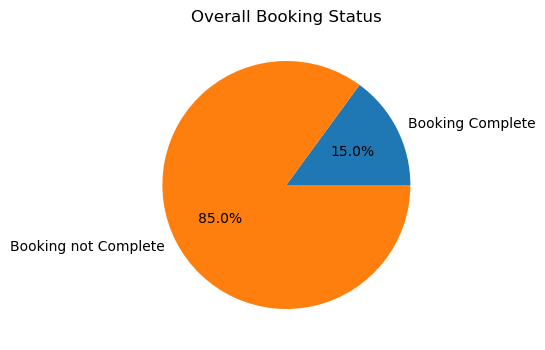

In [99]:
BS = ['Booking Complete', 'Booking not Complete']
 
data = [7478, 50000-7478]
 
# Creating plot
fig = plt.figure(figsize =(4, 5))
plt.pie(data, labels = BS,autopct='%1.1f%%')
 
# show plot
plt.title("Overall Booking Status")
plt.show()

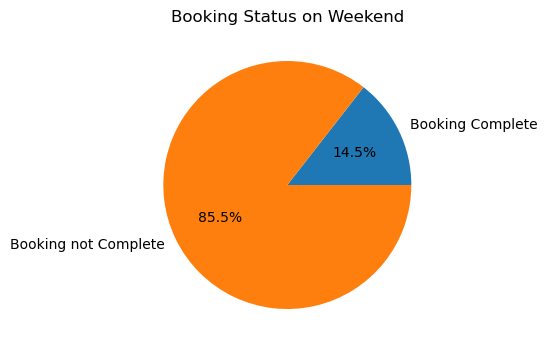

In [100]:
BS = ['Booking Complete', 'Booking not Complete']
 
data = [1788, 12366-1788]
 
# Creating plot
fig = plt.figure(figsize =(4, 5))
plt.pie(data, labels = BS,autopct='%1.1f%%')
 
# show plot
plt.title("Booking Status on Weekend")
plt.show()

In [61]:
x = dfn.loc[:,df.columns != 'booking_complete']
y = dfn['booking_complete']

In [62]:
X_train,X_test,y_train,y_test = train_test_split(x,y,test_size=0.3,random_state=0)

In [63]:
log_regression = LogisticRegression(max_iter=1500)
log_regression.fit(X_train,y_train)
y_pred = log_regression.predict(X_test)

In [72]:
logm1 = sm.GLM(y_train,(sm.add_constant(X_train)), family = sm.families.Binomial())
logm1.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:       booking_complete   No. Observations:                 8656
Model:                            GLM   Df Residuals:                     8642
Model Family:                Binomial   Df Model:                           13
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -3375.5
Date:                Sat, 24 Dec 2022   Deviance:                       6751.1
Time:                        20:37:54   Pearson chi2:                 8.51e+03
No. Iterations:                     7   Pseudo R-squ. (CS):            0.03887
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                     0.5124      0.719      0.713      0.476      -0.897       1.921
num_passengers            0.0264      0.031      0.857      0.392      -0.034       0.087
sales_channel            -0.6291      0.106     -5.961      0.000      -0.836      -0.422
trip_type                -1.3989      0.556     -2.514      0.012      -2.489      -0.308
purchase_lead            -0.0004      0.000     -1.234      0.217      -0.001       0.000
length_of_stay           -0.0036      0.001     -2.933      0.003      -0.006      -0.001
flight_hour               0.0053      0.006      0.923      0.356      -0.006       0.017
flight_day               -0.0810      0.063     -1.278      0.201      -0.205       0.043
wants_extra_baggage       0.3687      0.075      4.947      0.000       0.223       0.515
wants_preferred_seat      0.3707      0.071      5.226      0.000       0.232       0.510
wants_in_flight_meals     0.0331      0.069      0.481      0.630      -0.102       0.168
flight_duration          -0.1520      0.023     -6.707      0.000      -0.196      -0.108
route                 -7.336e-05      0.000     -0.515      0.607      -0.000       0.000
booking_origin            0.0109      0.001     11.099      0.000       0.009       0.013
=========================================================================================
"""

In [64]:
cnf_matrix = metrics.confusion_matrix(y_test, y_pred)
cnf_matrix

array([[3157,    0],
       [ 553,    0]])

In [65]:
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.8509433962264151


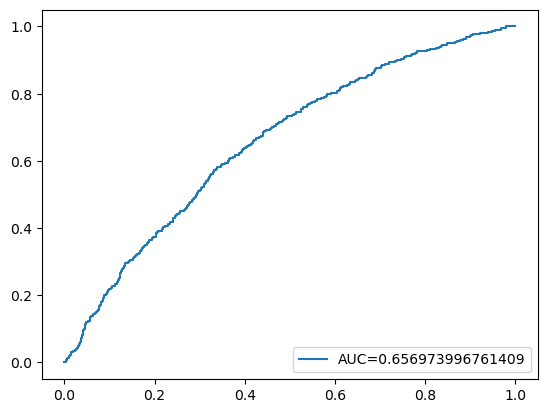

In [66]:
y_pred_proba = log_regression.predict_proba(X_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba)
auc = metrics.roc_auc_score(y_test, y_pred_proba)

#create ROC curve
plt.plot(fpr,tpr,label="AUC="+str(auc))
plt.legend(loc=4)
plt.show()
